# Slice sampler

This part is taken from [Robert and Casella (2004)](https://www.springer.com/gp/book/9780387212395).

At iteration $t$, simulate:

\begin{eqnarray}
 u^{(t+1)} &\sim& U_{[0,f(x^{(t)}]} \nonumber \\
 x^{(t+1)} &\sim& U_{A^{(t+1)}} \nonumber
\end{eqnarray}
with $A^{(t+1)} = \{ x: f(x) \geq u^{(t+1)} \}$

## Example 1

In this example, the *slice sampler* will be used to simulate from the density:
\begin{eqnarray}
f(x)=\frac{1}{2}\exp( -\sqrt{x} )
\end{eqnarray}

At iteration *t*, simulate:
\begin{eqnarray}
 u^{(t+1)} &\sim& U_{[0,\frac{1}{2}\exp( -\sqrt{x} )]} \nonumber \\
 x^{(t+1)} &\sim& U_{[0,(-\log(2u))^2]} \nonumber
\end{eqnarray}

In [10]:
import Pkg
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
┌ Error: curl_easy_setopt: 48
│ 
│ You may be using an old system libcurl library that doesn't understand options that Julia uses. You can try the following Julia code to see which libcurl library you are using:
│ 
│     using Libdl
│     filter!(contains("curl"), dllist())
│ 
│ If this indicates that Julia is not using the libcurl library that is shipped with Julia, then that is likely to be the problem. This either means:
│ 
│   1. You are using an unofficial Julia build which is configured to use a system lib

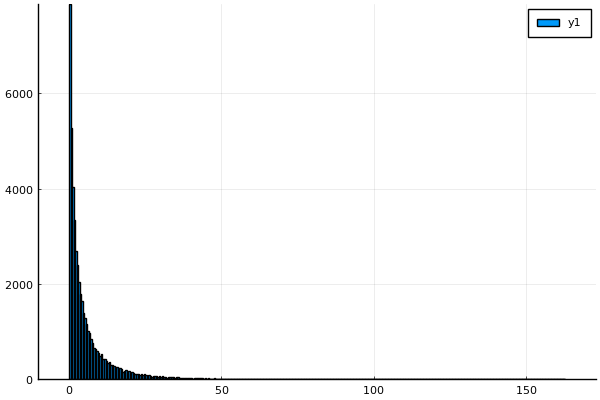

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [12]:
using Random, Distributions

# Setting the seed
Random.seed!(123)

function f(y)
    exp( -sqrt(y) ) / 2
end

nsim = 50000

x = rand(Uniform(0.0,1.0),nsim,1)

x[1] = -log.( rand(Uniform(0.0,1.0)) )

for i in 2:nsim
    w = rand(Uniform(0.0,f(x[i-1])))
    x[i] = rand(Uniform(0.0,(-log.(2*w))^2))
end

# Histogram of density
using Plots; pyplot()
Plots.PyPlotBackend()
histogram(x)

## Example 2

Now we consider a truncated normal distribution $\mathcal{N}$(3,1), which is restricted to the interval [0,1].

In this example, the _slice sampler_ will be used to simulate from the density:
[stem]
\begin{eqnarray}
f(x) \varpropto f_1(x) = \exp\big( -(x+3)^2/2 \big) \mathbb{1}_{[0,1]}{(x)}
\end{eqnarray}



At iteration $t$, simulate:
\begin{eqnarray}
 u^{(t+1)} &\sim& \exp\big( -(x+3)^2/2 \big) U_{[0,1]} \nonumber \\
 x^{(t+1)} &\sim& U_{[0,(-3+\sqrt{-2\log(u)})]} \nonumber
\end{eqnarray}


In [13]:
Pkg.add("Statistics")

   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [10745b16] + Statistics v1.9.0
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


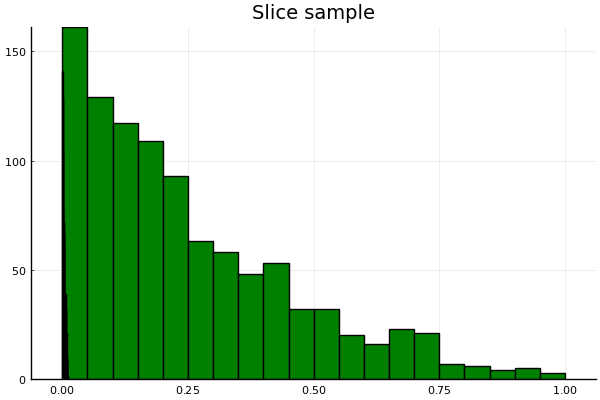

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [14]:
using Random, Statistics, Distributions, Plots

# Sample from a N(-3,1) truncated to [0,1] using the slice sampler
nsim = 1000

obs = zeros(nsim, 2)
obs[1, 1] = 0.25
obs[1, 2] = 0.5 * exp(-0.5 * (obs[1, 1] + 3)^2)

for i in 2:nsim
    obs[i, 2] = exp(-0.5 * (obs[i - 1, 1] + 3)^2) * rand()
    obs[i, 1] = rand() * min(1, -3 + sqrt(-2 * log(obs[i, 2])))
end

histogram(obs, title="Slice sample", legend=false, bins=25, fillcolor=:green)